In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
!pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable


pd.DataFrame()

In [3]:
from sklearn import datasets

iris = datasets.load_iris()

In [4]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [5]:
df = pd.DataFrame(iris.data, columns = iris.feature_names)

# df is finished creation


In [6]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
df["target"] = iris.target

In [8]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [9]:
target_names = list(iris.target_names)
df["target_names"] = df["target"].apply(lambda x: target_names[x])

In [10]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [11]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [12]:
pivot = pd.pivot_table(df, index=["target_names"], aggfunc={"sepal length (cm)":"mean"})

In [13]:
pivot

,sepal length (cm)
target_names,
setosa,5.006
versicolor,5.936
virginica,6.588


In [14]:
pivot1 = pd.pivot_table(df, index=["target_names"], aggfunc={"sepal length (cm)":"std"})

In [15]:
pivot1

,sepal length (cm)
target_names,
setosa,0.352490
versicolor,0.516171
virginica,0.635880


<AxesSubplot:>

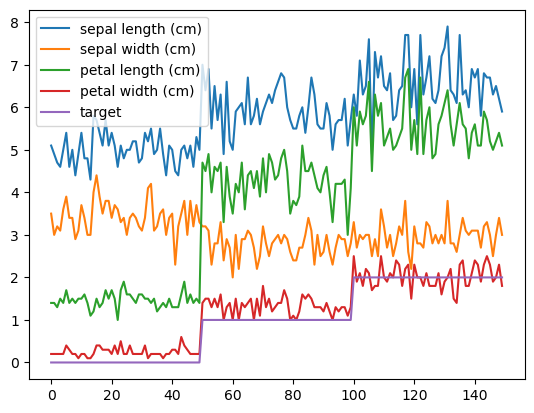

In [16]:
df.plot()

In [17]:
X = df[["sepal length (cm)","sepal width (cm)", "petal length (cm)" ,"petal width (cm)"]]

In [18]:
Y = df[["target_names"]]

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.30)

In [62]:
X_train.shape

(105, 4)

In [63]:
X_test.shape

(45, 4)

In [64]:
pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC())])

In [65]:
pipe.fit(X_train,y_train)

/home/arunachalam/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('scaler', StandardScaler()), ('svc', SVC())])

In [66]:
y_pred = pipe.predict(X_test)

In [67]:
y_pred

array(['virginica', 'versicolor', 'setosa', 'versicolor', 'setosa',
       'setosa', 'versicolor', 'setosa', 'setosa', 'versicolor',
       'versicolor', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'virginica', 'setosa', 'setosa', 'setosa', 'virginica',
       'versicolor', 'setosa', 'setosa', 'virginica', 'versicolor',
       'setosa', 'virginica', 'virginica', 'versicolor', 'setosa',
       'virginica', 'virginica', 'setosa', 'virginica', 'setosa',
       'virginica', 'virginica', 'setosa', 'virginica', 'versicolor',
       'setosa', 'versicolor', 'versicolor', 'setosa', 'versicolor'],
      dtype=object)

In [68]:
from sklearn.metrics import accuracy_score, f1_score
from sklearn.ensemble import RandomForestClassifier

In [69]:
accuracy_score(y_test, y_pred)

0.9555555555555556

In [70]:
f1_score(y_test, y_pred,average="weighted")

0.9555555555555556

In [71]:
pipe_rf = Pipeline([("scaler",StandardScaler()),("ensemble",RandomForestClassifier() )])

In [72]:
pipe_rf.fit(X_train,y_train)

/home/arunachalam/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Pipeline(steps=[('scaler', StandardScaler()),
                ('ensemble', RandomForestClassifier())])

In [73]:
y_rf_pred = pipe_rf.predict(X_test)

In [74]:
accuracy_score(y_test, y_rf_pred)

0.9555555555555556

In [75]:
f1_score(y_test,y_rf_pred, average="weighted")

0.9555555555555556

In [81]:
from pyspark.sql import *
spark = SparkSession.builder.appName("Datacamp Pyspark Tutorial").config("spark.memory.offHeap.enabled","true").config("spark.memory.offHeap.size","1g").getOrCreate()

23/10/24 14:07:27 WARN SparkSession: Using an existing Spark session; only runtime SQL configurations will take effect.


In [82]:
!pip install pyspark

Defaulting to user installation because normal site-packages is not writeable


In [83]:
spark

In [85]:
spark.conf.set("spark.sql.execution.arrow.enabled", "true")
 
spark_df = spark.createDataFrame(df)

23/10/24 14:24:46 WARN SQLConf: The SQL config 'spark.sql.execution.arrow.enabled' has been deprecated in Spark v3.0 and may be removed in the future. Use 'spark.sql.execution.arrow.pyspark.enabled' instead of it.
/home/arunachalam/.local/lib/python3.10/site-packages/pyspark/sql/pandas/conversion.py:351: UserWarning: createDataFrame attempted Arrow optimization because 'spark.sql.execution.arrow.pyspark.enabled' is set to true; however, failed by the reason below:
  PyArrow >= 4.0.0 must be installed; however, it was not found.
Attempting non-optimization as 'spark.sql.execution.arrow.pyspark.fallback.enabled' is set to true.
  warn(msg)


PySparkTypeError: [CANNOT_INFER_TYPE_FOR_FIELD] Unable to infer the type of the field `target_names`.

In [86]:
df1 = pd.DataFrame(iris.data,columns=iris.feature_names)

In [87]:
df1

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [89]:
spark_df = spark.createDataFrame(df1)

In [90]:
spark_df.show(10)

+-----------------+----------------+-----------------+----------------+
|sepal length (cm)|sepal width (cm)|petal length (cm)|petal width (cm)|
+-----------------+----------------+-----------------+----------------+
|              5.1|             3.5|              1.4|             0.2|
|              4.9|             3.0|              1.4|             0.2|
|              4.7|             3.2|              1.3|             0.2|
|              4.6|             3.1|              1.5|             0.2|
|              5.0|             3.6|              1.4|             0.2|
|              5.4|             3.9|              1.7|             0.4|
|              4.6|             3.4|              1.4|             0.3|
|              5.0|             3.4|              1.5|             0.2|
|              4.4|             2.9|              1.4|             0.2|
|              4.9|             3.1|              1.5|             0.1|
+-----------------+----------------+-----------------+----------

In [92]:
!pip install py4j

Defaulting to user installation because normal site-packages is not writeable


In [93]:
spark_df.toPandas()

Py4JError: An error occurred while calling o120.pandasStructHandlingMode. Trace:
py4j.Py4JException: Method pandasStructHandlingMode([]) does not exist
	at py4j.reflection.ReflectionEngine.getMethod(ReflectionEngine.java:321)
	at py4j.reflection.ReflectionEngine.getMethod(ReflectionEngine.java:329)
	at py4j.Gateway.invoke(Gateway.java:274)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.ClientServerConnection.waitForCommands(ClientServerConnection.java:182)
	at py4j.ClientServerConnection.run(ClientServerConnection.java:106)
	at java.base/java.lang.Thread.run(Thread.java:829)



In [95]:
spark_df.corr("sepal length (cm)","sepal width (cm)")

-0.11756978413300216

In [97]:
from pyspark.sql.functions import monotonically_increasing_id, map_contains_key

In [101]:
spark_df_target = spark.createDataFrame([(int(i),) for i in iris.target],["target"])

In [102]:
spark_df_target.show(10)

+------+
|target|
+------+
|     0|
|     0|
|     0|
|     0|
|     0|
|     0|
|     0|
|     0|
|     0|
|     0|
+------+
only showing top 10 rows



In [107]:
spark_df = spark_df.withColumn("id", monotonically_increasing_id())
spark_df_target = spark_df_target.withColumn("id",monotonically_increasing_id())

In [111]:
spark_df = spark_df.join(spark_df_target, "id").drop("id")

In [112]:
spark_df.show(10)


+-----------------+----------------+-----------------+----------------+------+
|sepal length (cm)|sepal width (cm)|petal length (cm)|petal width (cm)|target|
+-----------------+----------------+-----------------+----------------+------+
|              5.0|             3.4|              1.6|             0.4|     0|
|              4.7|             3.2|              1.6|             0.2|     0|
|              5.1|             3.8|              1.5|             0.3|     0|
|              5.1|             3.5|              1.4|             0.2|     0|
|              4.6|             3.6|              1.0|             0.2|     0|
|              5.0|             3.4|              1.5|             0.2|     0|
|              4.9|             3.1|              1.5|             0.2|     0|
|              5.2|             4.1|              1.5|             0.1|     0|
|              5.4|             3.4|              1.5|             0.4|     0|
|              5.0|             3.0|              1.

In [113]:
spark_df_target.show(10)

+------+---+
|target| id|
+------+---+
|     0|  0|
|     0|  1|
|     0|  2|
|     0|  3|
|     0|  4|
|     0|  5|
|     0|  6|
|     0|  7|
|     0|  8|
|     0|  9|
+------+---+
only showing top 10 rows



In [118]:
l = list(iris.target_names)
def get_target_names(fun):
    print(fun.value)
    return l[fun]
spark_df.withColumn("target_names",get_target_names(spark_df.target.for))

Column<'target[value]'>


TypeError: list indices must be integers or slices, not Column

In [125]:
from pyspark.ml import Pipeline
from pyspark.ml.classification import RandomForestClassifier, LinearSVC
from pyspark.ml.feature import StringIndexer, VectorAssembler

In [120]:
df_sp = pd.DataFrame(iris.data, columns=iris.feature_names)
df_sp["target"] = iris.target


In [121]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [124]:
df = df.drop(["target"],axis=1)

In [158]:
# stringIndexer = StringIndexer(inputCol="Species", outputCol="label")

# Define the feature and label columns & Assemble the feature vector
assembler = VectorAssembler(
    inputCols=['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)'],
    outputCol="features"
)
assembler2 = VectorAssembler(
    inputCols=['target'],
    outputCol="targets"
)

In [164]:
rf = RandomForestClassifier(labelCol="features", featuresCol="targets")

In [159]:
spark_df = assembler2.transform(spark_df)
train_data, test_data =df.randomSplit([0.7, 0.3], seed=42)

AttributeError: 'DataFrame' object has no attribute 'randomSplit'

In [130]:
spark_df.show(10)

+-----------------+----------------+-----------------+----------------+------+
|sepal length (cm)|sepal width (cm)|petal length (cm)|petal width (cm)|target|
+-----------------+----------------+-----------------+----------------+------+
|              5.0|             3.4|              1.6|             0.4|     0|
|              4.7|             3.2|              1.6|             0.2|     0|
|              5.1|             3.8|              1.5|             0.3|     0|
|              5.1|             3.5|              1.4|             0.2|     0|
|              4.6|             3.6|              1.0|             0.2|     0|
|              5.0|             3.4|              1.5|             0.2|     0|
|              4.9|             3.1|              1.5|             0.2|     0|
|              5.2|             4.1|              1.5|             0.1|     0|
|              5.4|             3.4|              1.5|             0.4|     0|
|              5.0|             3.0|              1.

In [160]:
train_data, test_data = spark_df.randomSplit([0.7, 0.3], seed=42)

In [161]:
train_data

DataFrame[sepal length (cm): double, sepal width (cm): double, petal length (cm): double, petal width (cm): double, target: double, targets: vector]

In [165]:
pipeline = Pipeline(stages=[assembler, rf])

In [166]:
pipeline.fit(train_data)

IllegalArgumentException: requirement failed: Column features must be of type numeric but was actually of type struct<type:tinyint,size:int,indices:array<int>,values:array<double>>.

In [167]:
spark_df

DataFrame[sepal length (cm): double, sepal width (cm): double, petal length (cm): double, petal width (cm): double, target: double, targets: vector]

In [136]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target_names'],
      dtype='object')

In [137]:
list(df.columns)[:-1]

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [151]:
from pyspark.sql.functions import col
from pyspark.sql.types import DoubleType
spark_df = spark_df.withColumn("target", col("target").cast(DoubleType()))

In [170]:
from pyspark.pandas import DataFrame as pdf

/home/arunachalam/.local/lib/python3.10/site-packages/pyspark/pandas/__init__.py:50: UserWarning: 'PYARROW_IGNORE_TIMEZONE' environment variable was not set. It is required to set this environment variable to '1' in both driver and executor sides if you use pyarrow>=2.0.0. pandas-on-Spark will set it for you but it does not work if there is a Spark context already launched.
  warnings.warn(


In [169]:
!pip install pyarrow

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.0/40.0 MB 7.1 MB/s eta 0:00:000m eta 0:00:010:00:01


In [171]:
spark_pandas = pdf(iris.data, columns=iris.feature_names)

/home/arunachalam/.local/lib/python3.10/site-packages/pyspark/sql/pandas/serializers.py:224: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(series.dtype):


In [174]:
spark_pandas

Py4JError: An error occurred while calling o1017.pandasStructHandlingMode. Trace:
py4j.Py4JException: Method pandasStructHandlingMode([]) does not exist
	at py4j.reflection.ReflectionEngine.getMethod(ReflectionEngine.java:321)
	at py4j.reflection.ReflectionEngine.getMethod(ReflectionEngine.java:329)
	at py4j.Gateway.invoke(Gateway.java:274)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.ClientServerConnection.waitForCommands(ClientServerConnection.java:182)
	at py4j.ClientServerConnection.run(ClientServerConnection.java:106)
	at java.base/java.lang.Thread.run(Thread.java:829)



Py4JError: An error occurred while calling o1046.pandasStructHandlingMode. Trace:
py4j.Py4JException: Method pandasStructHandlingMode([]) does not exist
	at py4j.reflection.ReflectionEngine.getMethod(ReflectionEngine.java:321)
	at py4j.reflection.ReflectionEngine.getMethod(ReflectionEngine.java:329)
	at py4j.Gateway.invoke(Gateway.java:274)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.ClientServerConnection.waitForCommands(ClientServerConnection.java:182)
	at py4j.ClientServerConnection.run(ClientServerConnection.java:106)
	at java.base/java.lang.Thread.run(Thread.java:829)



In [173]:
spark.conf.set("spark.sql.execution.arrow.pyspark.enabled", "false")
